In [90]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from functools import reduce
import datetime

In [2]:
#create a function for auto loading the csvs
df1= pd.read_csv('MD_COVID-19_-_Total_Hospitalizations.csv')
df2= pd.read_csv('MD_COVID-19_-_Total_Currently_Hospitalized_-_Acute_and_ICU.csv')
df3=pd.read_csv('MD_COVID-19_-_Confirmed_Deaths_by_Gender_Distribution.csv')
df4=pd.read_csv('MD_COVID-19_-_Confirmed_Deaths_by_Age_Distribution.csv')

In [3]:
from IPython.display import display
display(df1.head())
display(df2.head())
display(df3.head())
display(df4.head())

,OBJECTID,DATE,Count
0,1,03/13/2020 10:00:00 AM,2.0
1,2,03/14/2020 10:00:00 AM,3.0
2,3,03/15/2020 10:00:00 AM,NaN
3,4,03/16/2020 10:00:00 AM,4.0
4,5,03/17/2020 10:00:00 AM,NaN


,OBJECTID,DATE,Acute,ICU,Total
0,1,03/26/2020 10:00:00 AM,68.0,40.0,108.0
1,2,03/27/2020 10:00:00 AM,76.0,70.0,146.0
2,3,03/28/2020 10:00:00 AM,113.0,72.0,185.0
3,4,03/29/2020 10:00:00 AM,118.0,94.0,212.0
4,5,03/30/2020 10:00:00 AM,150.0,110.0,260.0


,OBJECTID,DATE,Male,Female,Unknown
0,1,04/08/2020 10:00:00 AM,78,46,NaN
1,2,04/09/2020 10:00:00 AM,85,53,NaN
2,3,04/10/2020 10:00:00 AM,102,69,NaN
3,4,04/11/2020 10:00:00 AM,121,85,NaN
4,5,04/12/2020 10:00:00 AM,136,99,NaN


,OBJECTID,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown
0,1,04/08/2020 10:00:00 AM,0,0,0,4,4,16,26,39,35,NaN
1,2,04/09/2020 10:00:00 AM,0,0,0,4,4,16,28,43,43,NaN
2,3,04/10/2020 10:00:00 AM,0,0,0,5,5,20,32,51,58,NaN
3,4,04/11/2020 10:00:00 AM,0,0,1,8,5,22,42,57,71,NaN
4,5,04/12/2020 10:00:00 AM,0,0,1,9,5,25,51,65,79,NaN


In [4]:
#streamline code for loading all csv at once
folder='/Users/iffy/CovidHospitality/'
file=glob.glob(folder+'*.csv')
#load all csvs into a list of nested dataframe
dfs = [pd.read_csv(f) for f in file]
print('type: ',type(dfs))
print('lenght: ',len(dfs))
dfs[0]

type:  <class 'list'>
lenght:  4


,OBJECTID,DATE,Male,Female,Unknown
0,1,04/08/2020 10:00:00 AM,78,46,NaN
1,2,04/09/2020 10:00:00 AM,85,53,NaN
2,3,04/10/2020 10:00:00 AM,102,69,NaN
3,4,04/11/2020 10:00:00 AM,121,85,NaN
4,5,04/12/2020 10:00:00 AM,136,99,NaN
...,...,...,...,...,...
523,524,09/13/2021 10:00:00 AM,5155,4809,0.0
524,525,09/14/2021 10:00:00 AM,5163,4816,0.0
525,526,09/15/2021 10:00:00 AM,5166,4824,0.0
526,527,09/16/2021 10:00:00 AM,5178,4833,0.0


In [5]:
#convert datetime to date only
#set up in a loop below
df1['DATE'] = pd.to_datetime(df1['DATE']).dt.date
df2['DATE'] = pd.to_datetime(df2['DATE']).dt.date
df3['DATE'] = pd.to_datetime(df3['DATE']).dt.date
df4['DATE'] = pd.to_datetime(df4['DATE']).dt.date

In [6]:
display(df1.head())
display(df2.head())
display(df3.head())
display(df4.head())

,OBJECTID,DATE,Count
0,1,2020-03-13,2.0
1,2,2020-03-14,3.0
2,3,2020-03-15,NaN
3,4,2020-03-16,4.0
4,5,2020-03-17,NaN


,OBJECTID,DATE,Acute,ICU,Total
0,1,2020-03-26,68.0,40.0,108.0
1,2,2020-03-27,76.0,70.0,146.0
2,3,2020-03-28,113.0,72.0,185.0
3,4,2020-03-29,118.0,94.0,212.0
4,5,2020-03-30,150.0,110.0,260.0


,OBJECTID,DATE,Male,Female,Unknown
0,1,2020-04-08,78,46,NaN
1,2,2020-04-09,85,53,NaN
2,3,2020-04-10,102,69,NaN
3,4,2020-04-11,121,85,NaN
4,5,2020-04-12,136,99,NaN


,OBJECTID,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown
0,1,2020-04-08,0,0,0,4,4,16,26,39,35,NaN
1,2,2020-04-09,0,0,0,4,4,16,28,43,43,NaN
2,3,2020-04-10,0,0,0,5,5,20,32,51,58,NaN
3,4,2020-04-11,0,0,1,8,5,22,42,57,71,NaN
4,5,2020-04-12,0,0,1,9,5,25,51,65,79,NaN


In [7]:
#create a for loop for this function
df=df1.merge(df2, how='left', on='DATE')
df=df.merge(df3, how='left', on='DATE')
df=df.merge(df4, how='left', on='DATE')
df

,OBJECTID_x,DATE,Count,OBJECTID_y,Acute,ICU,Total,OBJECTID_x,Male,Female,...,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown
0,1,2020-03-13,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-03-14,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2020-03-16,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,550,2021-09-13,47141.0,537.0,597.0,205.0,802.0,524.0,5155.0,4809.0,...,4.0,6.0,48.0,125.0,316.0,880.0,1704.0,2516.0,4363.0,2.0
550,551,2021-09-14,47215.0,538.0,622.0,206.0,828.0,525.0,5163.0,4816.0,...,4.0,6.0,48.0,124.0,319.0,884.0,1705.0,2521.0,4366.0,2.0
551,552,2021-09-15,47297.0,539.0,602.0,217.0,819.0,526.0,5166.0,4824.0,...,4.0,6.0,48.0,125.0,319.0,884.0,1708.0,2523.0,4371.0,2.0
552,553,2021-09-16,47396.0,540.0,593.0,211.0,804.0,527.0,5178.0,4833.0,...,4.0,6.0,48.0,125.0,321.0,886.0,1715.0,2525.0,4379.0,2.0


In [8]:
#More streamlined code
#reduce the nested dataframe into a single dataframe
df = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'], how='inner'), dfs)
df['DATE']=pd.to_datetime(df['DATE']).dt.date #to convert to datetime
df

,OBJECTID_x,DATE,Male,Female,Unknown,OBJECTID_y,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,...,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown,OBJECTID_x,Acute,ICU,Total,OBJECTID_y,Count
0,1,2020-04-08,78,46,NaN,1,0,0,0,4,...,26,39,35,NaN,14,539.0,309.0,848.0,27,1210.0
1,2,2020-04-09,85,53,NaN,2,0,0,0,4,...,28,43,43,NaN,15,581.0,343.0,924.0,28,1348.0
2,3,2020-04-10,102,69,NaN,3,0,0,0,5,...,32,51,58,NaN,16,560.0,358.0,918.0,29,1413.0
3,4,2020-04-11,121,85,NaN,4,0,0,1,8,...,42,57,71,NaN,17,641.0,379.0,1020.0,30,1709.0
4,5,2020-04-12,136,99,NaN,5,0,0,1,9,...,51,65,79,NaN,18,633.0,386.0,1019.0,31,1860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,524,2021-09-13,5155,4809,0.0,524,4,6,48,125,...,1704,2516,4363,2.0,537,597.0,205.0,802.0,550,47141.0
524,525,2021-09-14,5163,4816,0.0,525,4,6,48,124,...,1705,2521,4366,2.0,538,622.0,206.0,828.0,551,47215.0
525,526,2021-09-15,5166,4824,0.0,526,4,6,48,125,...,1708,2523,4371,2.0,539,602.0,217.0,819.0,552,47297.0
526,527,2021-09-16,5178,4833,0.0,527,4,6,48,125,...,1715,2525,4379,2.0,540,593.0,211.0,804.0,553,47396.0


In [9]:
df.columns

Index(['OBJECTID_x', 'DATE', 'Male', 'Female', 'Unknown', 'OBJECTID_y',
       'Age_0_to_9', 'Age_10_to_19', 'Age_20_to_29', 'Age_30_to_39',
       'Age_40_to_49', 'Age_50_to_59', 'Age_60_to_69', 'Age_70_to_79',
       'Age_80plus', 'Age_Unknown', 'OBJECTID_x', 'Acute', 'ICU', 'Total',
       'OBJECTID_y', 'Count'],
      dtype='object')

In [10]:
#drop repeated and unnecessary columns
df=df.drop(['OBJECTID_x','OBJECTID_y','Unknown'], axis=1)

In [11]:
df.columns

Index(['DATE', 'Male', 'Female', 'Age_0_to_9', 'Age_10_to_19', 'Age_20_to_29',
       'Age_30_to_39', 'Age_40_to_49', 'Age_50_to_59', 'Age_60_to_69',
       'Age_70_to_79', 'Age_80plus', 'Age_Unknown', 'Acute', 'ICU', 'Total',
       'Count'],
      dtype='object')

In [12]:
df

,DATE,Male,Female,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown,Acute,ICU,Total,Count
0,2020-04-08,78,46,0,0,0,4,4,16,26,39,35,NaN,539.0,309.0,848.0,1210.0
1,2020-04-09,85,53,0,0,0,4,4,16,28,43,43,NaN,581.0,343.0,924.0,1348.0
2,2020-04-10,102,69,0,0,0,5,5,20,32,51,58,NaN,560.0,358.0,918.0,1413.0
3,2020-04-11,121,85,0,0,1,8,5,22,42,57,71,NaN,641.0,379.0,1020.0,1709.0
4,2020-04-12,136,99,0,0,1,9,5,25,51,65,79,NaN,633.0,386.0,1019.0,1860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2021-09-13,5155,4809,4,6,48,125,316,880,1704,2516,4363,2.0,597.0,205.0,802.0,47141.0
524,2021-09-14,5163,4816,4,6,48,124,319,884,1705,2521,4366,2.0,622.0,206.0,828.0,47215.0
525,2021-09-15,5166,4824,4,6,48,125,319,884,1708,2523,4371,2.0,602.0,217.0,819.0,47297.0
526,2021-09-16,5178,4833,4,6,48,125,321,886,1715,2525,4379,2.0,593.0,211.0,804.0,47396.0


In [13]:
df.isna().sum() #the null values are relatively low. they can be removed

DATE            0
Male            0
Female          0
Age_0_to_9      0
Age_10_to_19    0
Age_20_to_29    0
Age_30_to_39    0
Age_40_to_49    0
Age_50_to_59    0
Age_60_to_69    0
Age_70_to_79    0
Age_80plus      0
Age_Unknown     6
Acute           0
ICU             0
Total           0
Count           0
dtype: int64

In [14]:
#reset index
df=df.dropna()
df= df.reset_index(drop=True)
df

,DATE,Male,Female,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown,Acute,ICU,Total,Count
0,2020-04-14,165,137,0,0,1,11,6,29,69,83,103,0.0,631.0,448.0,1079.0,2122.0
1,2020-04-15,185,164,0,0,1,5,5,18,53,71,107,89.0,718.0,438.0,1156.0,2231.0
2,2020-04-16,205,187,0,0,2,6,6,23,61,77,123,94.0,788.0,431.0,1219.0,2451.0
3,2020-04-17,227,198,0,0,2,8,7,24,68,87,141,88.0,762.0,439.0,1201.0,2612.0
4,2020-04-18,244,218,0,0,2,8,9,24,72,93,153,102.0,800.0,488.0,1288.0,2757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2021-09-13,5155,4809,4,6,48,125,316,880,1704,2516,4363,2.0,597.0,205.0,802.0,47141.0
518,2021-09-14,5163,4816,4,6,48,124,319,884,1705,2521,4366,2.0,622.0,206.0,828.0,47215.0
519,2021-09-15,5166,4824,4,6,48,125,319,884,1708,2523,4371,2.0,602.0,217.0,819.0,47297.0
520,2021-09-16,5178,4833,4,6,48,125,321,886,1715,2525,4379,2.0,593.0,211.0,804.0,47396.0


In [37]:
df['DATE'].count()

522

In [89]:
#Checks for total days present and see if matched with dataframe total rows
#if total days is less than rows of dataframe, then missing dates
a=df['DATE'].iloc[0]
print('a: ',a)
b=df['DATE'].iloc[-1]
print('b: ', b)
print('total days: ', b-a)
#Note it says 521 days to the 522 rows. This is due to indexing

a:  2020-04-14
b:  2021-09-17
total days:  521 days, 0:00:00


In [88]:
df.dtypes

DATE             object
Male              int64
Female            int64
Age_0_to_9        int64
Age_10_to_19      int64
Age_20_to_29      int64
Age_30_to_39      int64
Age_40_to_49      int64
Age_50_to_59      int64
Age_60_to_69      int64
Age_70_to_79      int64
Age_80plus        int64
Age_Unknown     float64
Acute           float64
ICU             float64
Total           float64
Count           float64
dtype: object

In [63]:
#check sex and age range on specific date
#each date entrance for sex and age group should equal
sex=df['Male'] + df['Female']
sex=sex.to_frame()
sex=sex.rename(columns={0:'sex'}) #have to rename column
sex

,sex
0,302
1,349
2,392
3,425
4,462
...,...
517,9964
518,9979
519,9990
520,10011


In [65]:
age=df['Age_0_to_9']+df['Age_10_to_19']+df['Age_20_to_29']+ df['Age_30_to_39']+df['Age_40_to_49']+
    df['Age_50_to_59']+df['Age_60_to_69']+df['Age_70_to_79']+df['Age_80plus']

In [66]:
age=age.to_frame()
age= age.rename(columns={0:'age'})
age

,age
0,302
1,260
2,298
3,337
4,361
...,...
517,9962
518,9977
519,9988
520,10009


In [71]:
#agesex=[sex,age]
agesex=pd.concat([age,sex], axis=1)
agesex

,age,sex
0,302,302
1,260,349
2,298,392
3,337,425
4,361,462
...,...,...
517,9962,9964
518,9977,9979
519,9988,9990
520,10009,10011


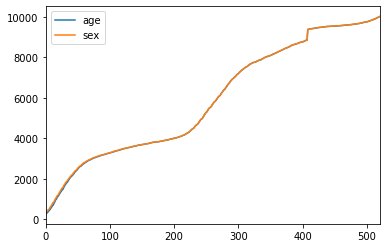

In [91]:
agesex.plot(y=['age', 'sex'], use_index=True) #they are close but not exact

In [75]:
#check the difference between the Count column and the total patients admitted
countH=df['Count']
countH=countH.to_frame()
countH

,Count
0,2122.0
1,2231.0
2,2451.0
3,2612.0
4,2757.0
...,...
517,47141.0
518,47215.0
519,47297.0
520,47396.0


In [76]:
hosp=pd.concat([agesex,countH], axis=1)
hosp

,age,sex,Count
0,302,302,2122.0
1,260,349,2231.0
2,298,392,2451.0
3,337,425,2612.0
4,361,462,2757.0
...,...,...,...
517,9962,9964,47141.0
518,9977,9979,47215.0
519,9988,9990,47297.0
520,10009,10011,47396.0


In [81]:
hosp.describe()

,age,sex,Count
count,522.000000,522.000000,522.000000
mean,5919.808429,5931.582375,26759.293103
std,2861.315783,2847.246308,14166.526018
min,260.000000,302.000000,2122.000000
25%,3544.500000,3547.500000,13887.000000
50%,5702.000000,5704.000000,26541.500000
75%,8665.500000,8667.500000,42225.500000
max,10021.000000,10023.000000,47455.000000


,age,sex,Count
0,-1.963365,-1.977202,-1.739120
1,-1.978044,-1.960695,-1.731426
2,-1.964763,-1.945593,-1.715897
3,-1.951133,-1.934003,-1.704532
4,-1.942746,-1.921008,-1.694296
...,...,...,...
517,1.412704,1.416252,1.438723
518,1.417946,1.421520,1.443947
519,1.421790,1.425383,1.449735
520,1.429130,1.432759,1.456723


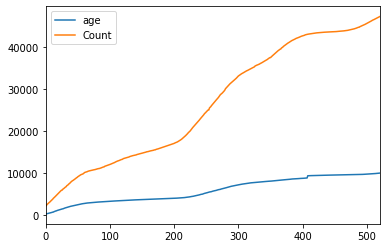

In [84]:
hosp.plot(y=['age','Count'],use_index=True)
#the difference is massive. Try normalizing and visualize again
normalized_hosp=(hosp-hosp.mean())/hosp.std()
normalized_hosp

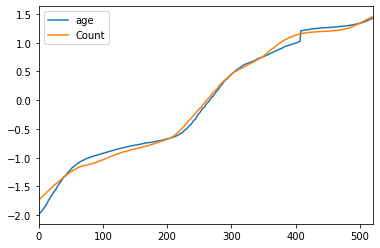

In [85]:
normalized_hosp.plot(y=['age', 'Count'], use_index=True)
#vis after normalization shows that trend of Count and age/sex are correlationally related
#but it does not tell us what the difference is between Count and total patient admitted
#most likely missing metadata for the early days of covid

In [16]:
df.describe()

,Male,Female,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown,Acute,ICU,Total,Count
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,3055.908046,2875.674330,1.555556,3.749042,29.095785,67.153257,177.208812,480.894636,975.216475,1497.122605,2687.812261,11.773946,609.450192,230.477011,839.929119,26759.293103
std,1479.303955,1368.038709,1.550734,2.283263,11.710619,29.813294,83.871580,246.178100,486.863881,732.233310,1272.119604,23.288037,380.217190,151.122049,514.875798,14166.526018
min,165.000000,137.000000,0.000000,0.000000,1.000000,5.000000,5.000000,18.000000,53.000000,71.000000,103.000000,0.000000,66.000000,29.000000,97.000000,2122.000000
25%,1805.500000,1742.000000,0.000000,1.000000,23.000000,46.000000,116.500000,286.250000,576.500000,879.000000,1616.250000,2.000000,297.000000,107.000000,407.500000,13887.000000
50%,2939.500000,2764.500000,1.000000,4.000000,27.000000,61.000000,169.500000,445.500000,879.000000,1446.000000,2669.000000,2.000000,545.500000,200.500000,763.000000,26541.500000
75%,4487.750000,4179.750000,3.000000,6.000000,41.000000,93.750000,249.000000,722.250000,1446.250000,2200.500000,3904.750000,4.000000,888.500000,338.500000,1242.250000,42225.500000
max,5183.000000,4840.000000,4.000000,6.000000,48.000000,125.000000,321.000000,888.000000,1718.000000,2528.000000,4383.000000,132.000000,1496.000000,611.000000,1952.000000,47455.000000


### Data is now clean enough for visualization

In [17]:
#plans: everythin in relation to date. see if trend increases as time passes
#look at relation between date and count
#see acute and ICU trend in relation to date
#breakdown acute and ICU between gender
#find the age group most affected

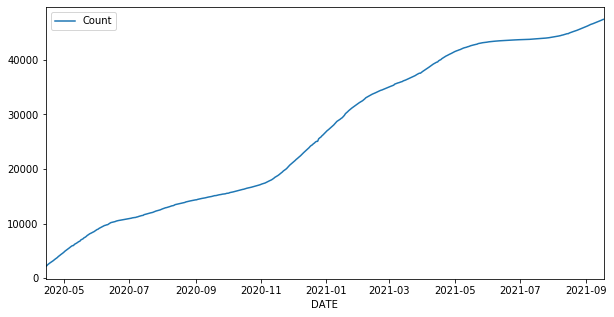

In [18]:
#Datetime vs Count
df.plot(x='DATE', y='Count', figsize=(10,5))

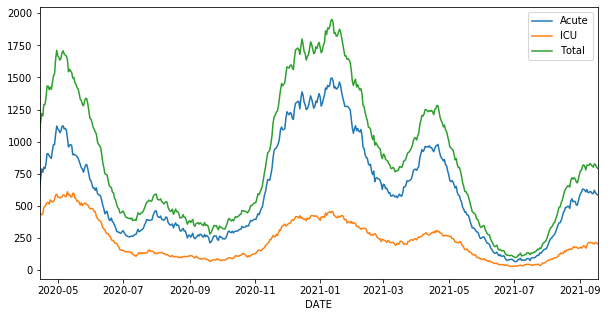

In [19]:
#Shows acute and ICU as time passes; total is the combined of acute and icu. 
df.plot(x='DATE', y=['Acute', 'ICU', 'Total'], figsize=(10,5))

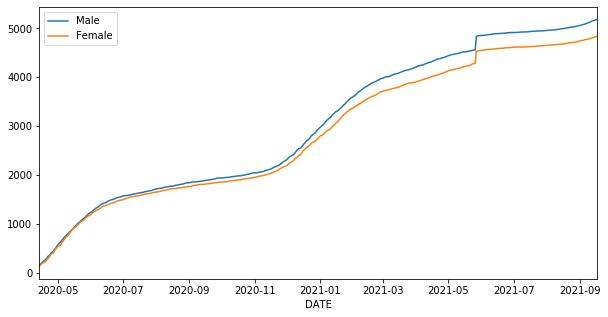

In [20]:
df.plot(x='DATE', y=['Male', 'Female'], figsize=(10,5))

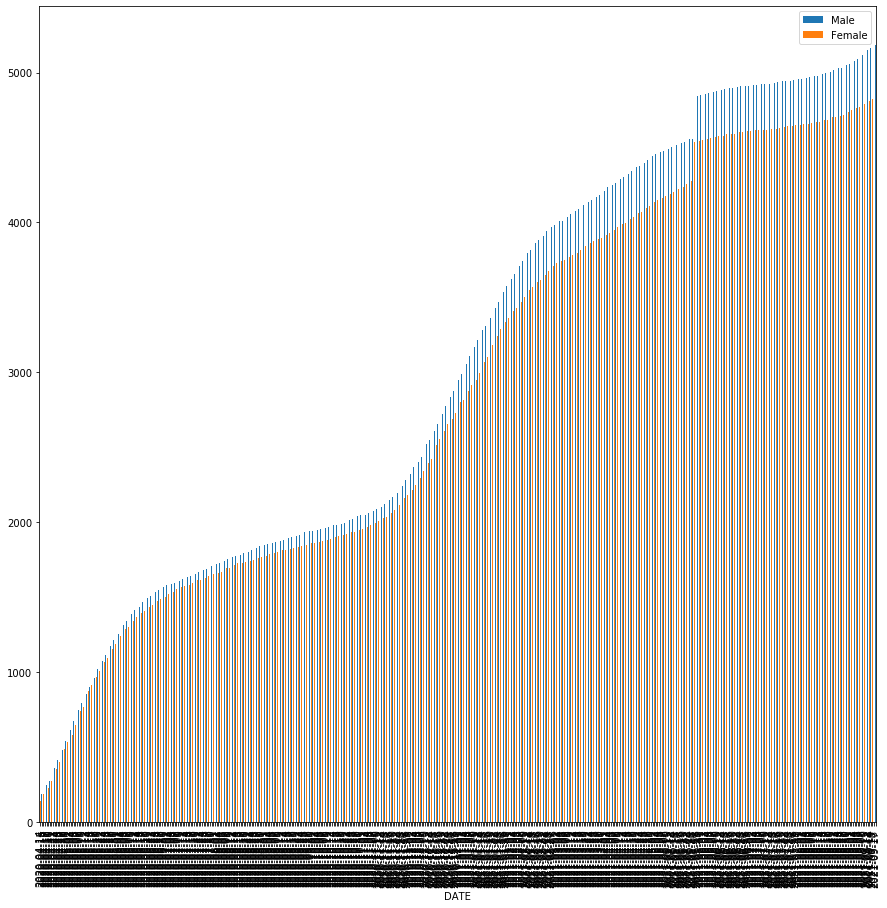

In [21]:
df.plot(x='DATE', y=['Male', 'Female'], kind='bar',figsize=(15,15))

In [22]:
#this is only to see the effected within the specific age range.
age=df.iloc[: , 3:13]
age

,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown
0,0,0,1,11,6,29,69,83,103,0.0
1,0,0,1,5,5,18,53,71,107,89.0
2,0,0,2,6,6,23,61,77,123,94.0
3,0,0,2,8,7,24,68,87,141,88.0
4,0,0,2,8,9,24,72,93,153,102.0
...,...,...,...,...,...,...,...,...,...,...
517,4,6,48,125,316,880,1704,2516,4363,2.0
518,4,6,48,124,319,884,1705,2521,4366,2.0
519,4,6,48,125,319,884,1708,2523,4371,2.0
520,4,6,48,125,321,886,1715,2525,4379,2.0


In [34]:
age.columns

Index(['Age_0_to_9', 'Age_10_to_19', 'Age_20_to_29', 'Age_30_to_39',
       'Age_40_to_49', 'Age_50_to_59', 'Age_60_to_69', 'Age_70_to_79',
       'Age_80plus', 'Age_Unknown'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0d78e8450>,
      dtype=object)

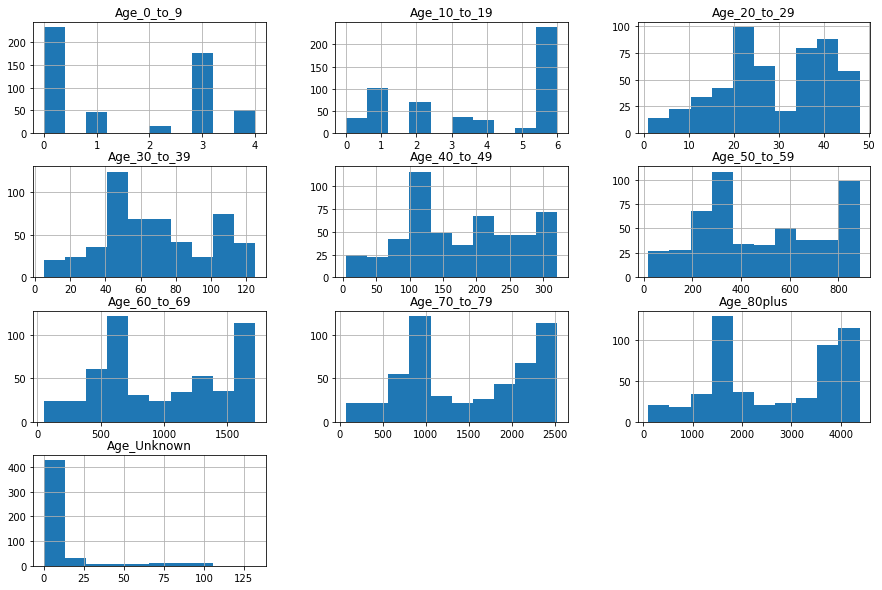

In [23]:
age.hist(figsize=(15,10))

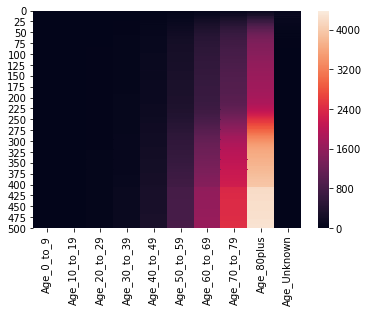

In [24]:
sns.heatmap(age)

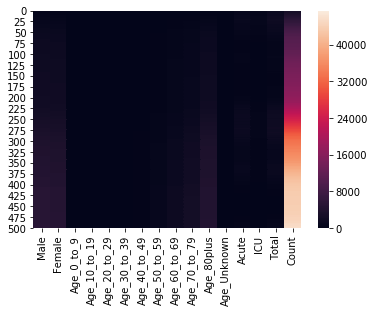

In [25]:
sns.heatmap(df.loc[:, df.columns != 'DATE'])

In [26]:
#both date and count are not necessary but gender is
nocountdate=df.loc[:, df.columns != 'DATE']
nocountdate=nocountdate.loc[:, nocountdate.columns != 'Count']

In [27]:
nocountdate

,Male,Female,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus,Age_Unknown,Acute,ICU,Total
0,165,137,0,0,1,11,6,29,69,83,103,0.0,631.0,448.0,1079.0
1,185,164,0,0,1,5,5,18,53,71,107,89.0,718.0,438.0,1156.0
2,205,187,0,0,2,6,6,23,61,77,123,94.0,788.0,431.0,1219.0
3,227,198,0,0,2,8,7,24,68,87,141,88.0,762.0,439.0,1201.0
4,244,218,0,0,2,8,9,24,72,93,153,102.0,800.0,488.0,1288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,5155,4809,4,6,48,125,316,880,1704,2516,4363,2.0,597.0,205.0,802.0
518,5163,4816,4,6,48,124,319,884,1705,2521,4366,2.0,622.0,206.0,828.0
519,5166,4824,4,6,48,125,319,884,1708,2523,4371,2.0,602.0,217.0,819.0
520,5178,4833,4,6,48,125,321,886,1715,2525,4379,2.0,593.0,211.0,804.0


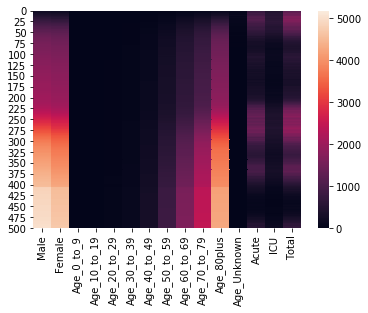

In [28]:
sns.heatmap(nocountdate)

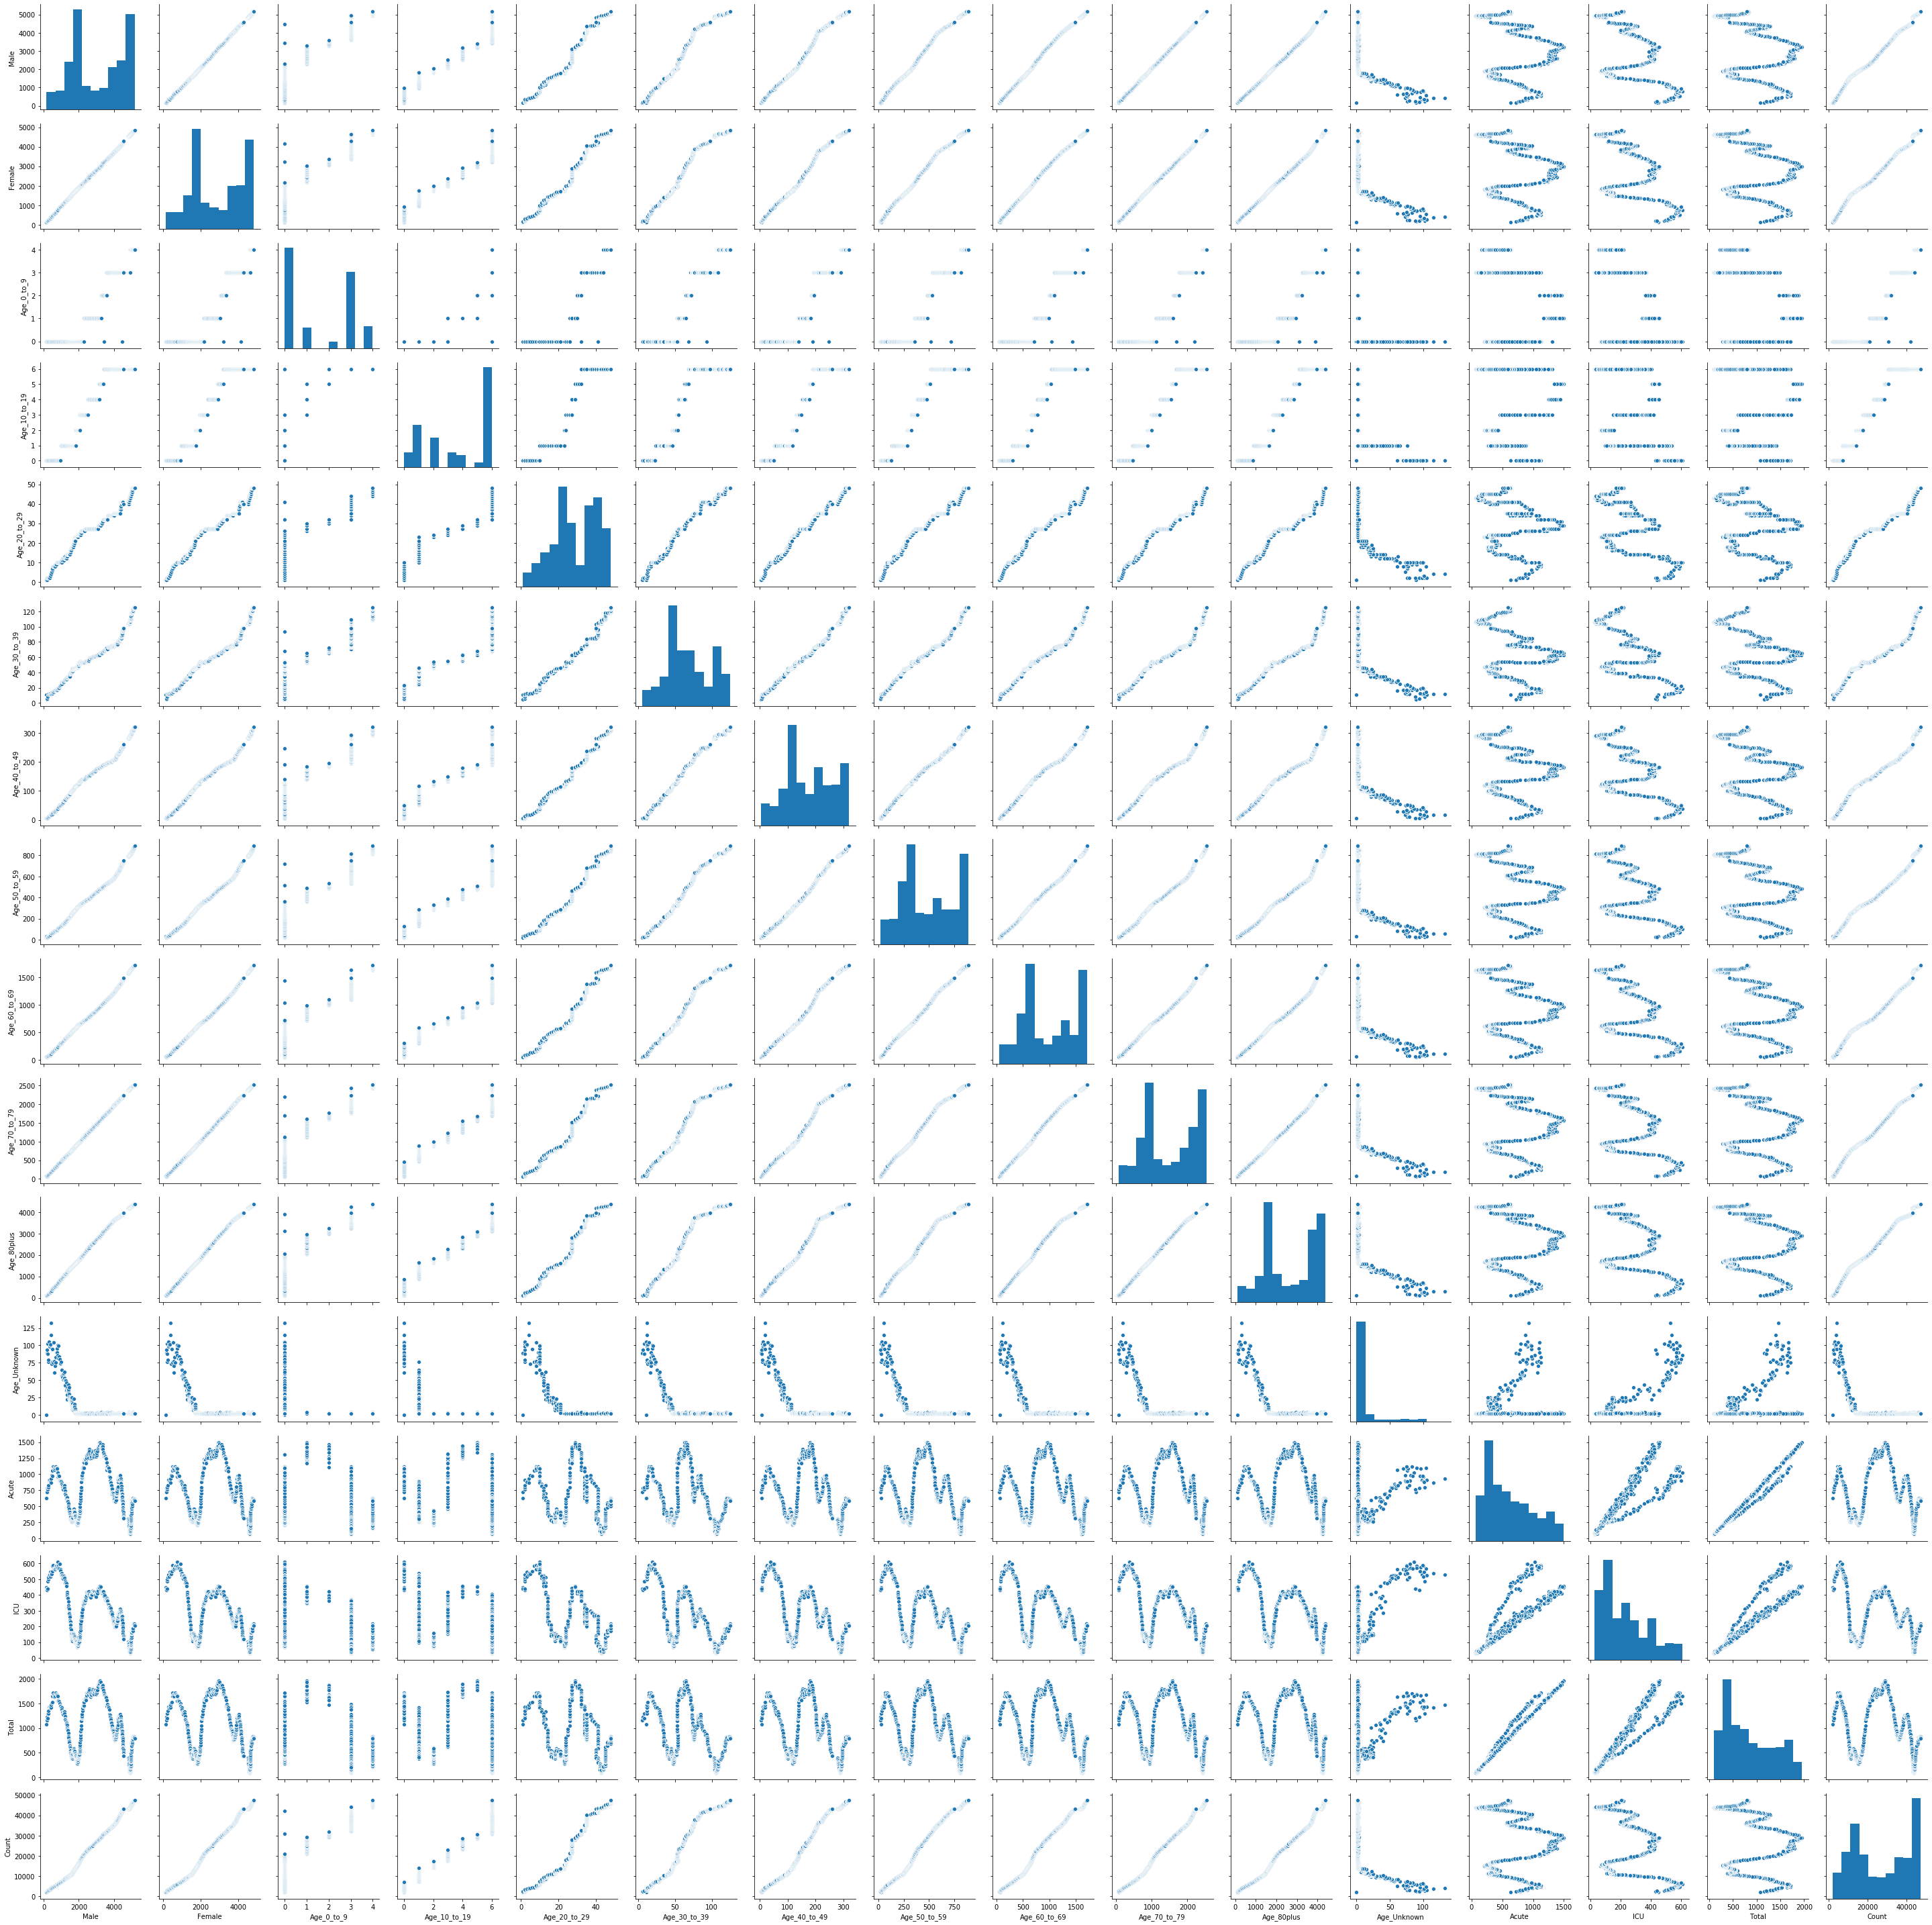

In [92]:
#try to not run this often as it is expensive and data is subpar
sns.pairplot(df)